In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [2]:
startup=pd.read_csv("C:\\Users\\SAGAR\\Downloads\\Startups50.csv")

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [6]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


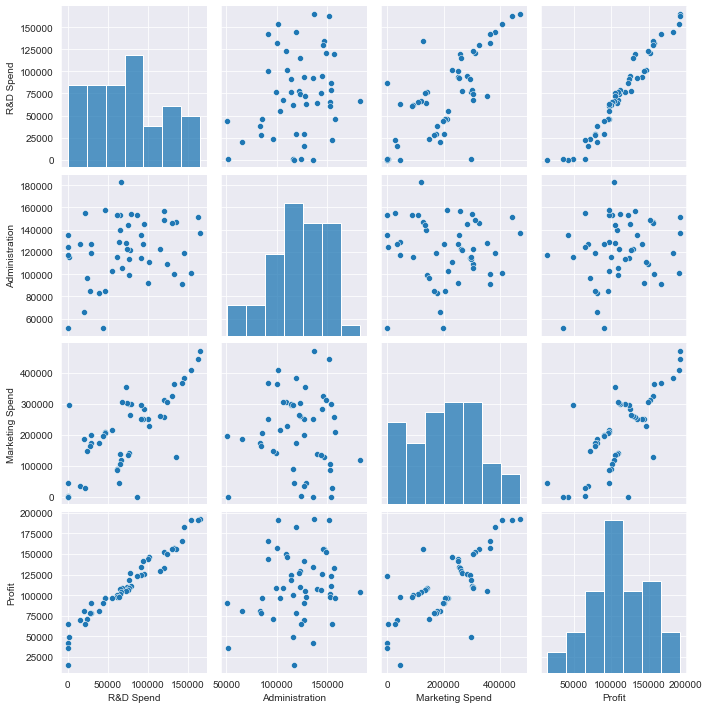

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)

In [9]:
startup=startup.rename({'R&D Spend':'spend','Marketing Spend':'MS'},axis=1)
startup.head()
                       

,spend,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Preparing a model

In [10]:
model=smf.ols('Profit~spend+Administration+MS',data=startup).fit()
model.params

Intercept         50122.192990
spend                 0.805715
Administration       -0.026816
MS                    0.027228
dtype: float64

In [11]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
spend             17.846374
Administration    -0.525507
MS                 1.655077
dtype: float64 
 Intercept         1.057379e-09
spend             2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        13:09:39   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
spend              0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS                 0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Simple Linear Regression Models

In [13]:
ml1=smf.ols('Profit~spend',data=startup).fit()


In [14]:
ml1.tvalues,'\n',ml1.pvalues

(Intercept    19.320288
 spend        29.151139
 dtype: float64,
 '\n',
 Intercept    2.782697e-24
 spend        3.500322e-32
 dtype: float64)

In [15]:
ml2=smf.ols('Profit~Administration',data=startup).fit()

In [16]:
ml2.tvalues,'\n',ml2.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 '\n',
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [17]:
ml3=smf.ols('Profit~MS',data=startup).fit()

In [18]:
ml3.tvalues,'\n',ml3.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 '\n',
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

calculating vif

In [19]:
ml_am=smf.ols('Profit~MS+spend',data=startup).fit()
ml_am

In [20]:
ml_am.tvalues,'\n',ml_am.pvalues

(Intercept    17.463582
 MS            1.927052
 spend        19.265555
 dtype: float64,
 '\n',
 Intercept    3.504062e-22
 MS           6.003040e-02
 spend        6.040433e-24
 dtype: float64)

Calculating vif

In [26]:
rsq_spend=smf.ols('spend~Administration+MS',data=startup).fit().rsquared
vif_spend=1/(1-rsq_spend)

rsq_Administration=smf.ols('Administration~spend+MS',data=startup).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

rsq_MS=smf.ols('MS~Administration+spend',data=startup).fit().rsquared
vif_MS=1/(1-rsq_MS)

d1={'variable':['spend','Administration','MS'],'vif':[vif_spend,vif_Administration,vif_MS]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,variable,vif
0,spend,2.468903
1,Administration,1.175091
2,MS,2.326773


Residual Analysis

In [40]:
np.random.normal()

0.832299725026165

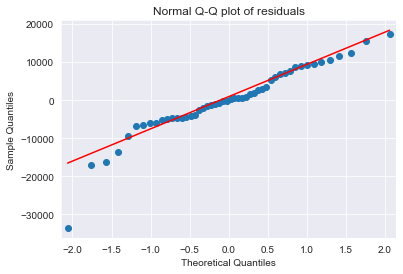

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

Residual Plot for Homoscedasticity

In [30]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

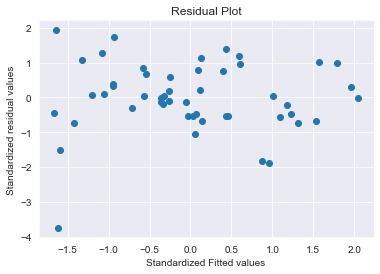

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual VS Regressors

eval_env: 1


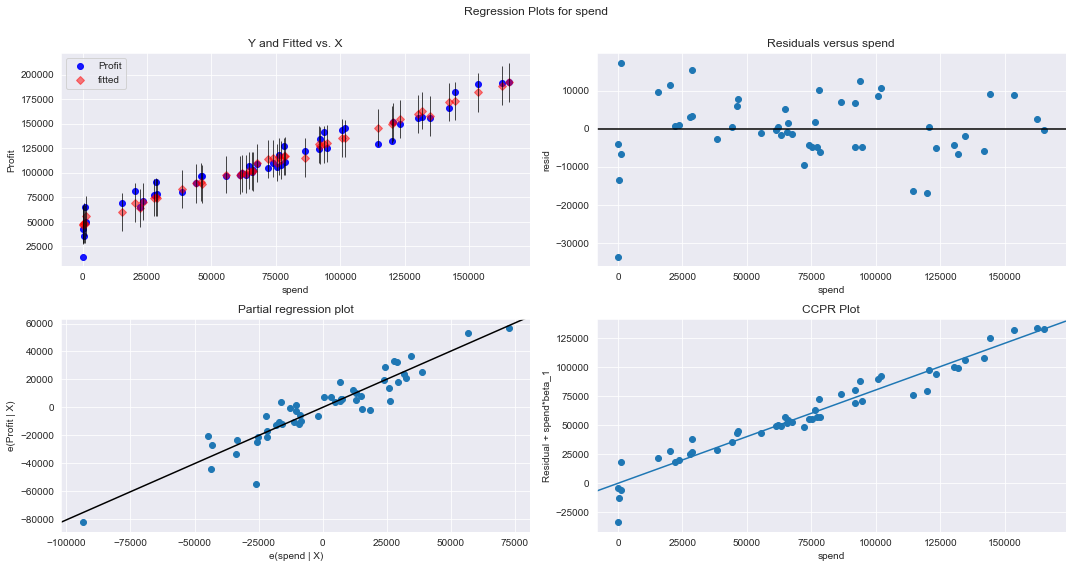

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"spend",fig=fig)
plt.show()

eval_env: 1


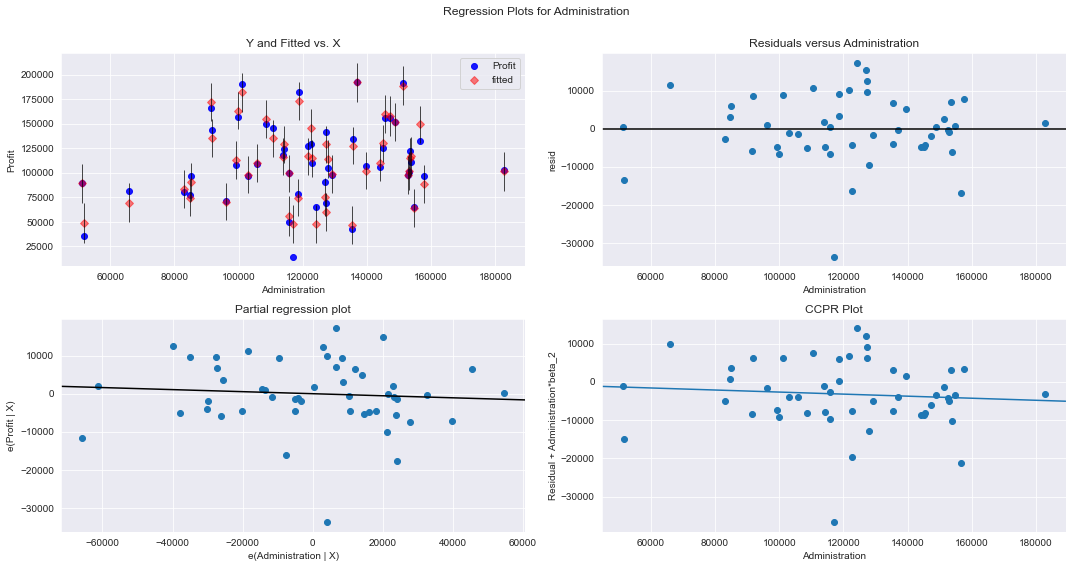

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

eval_env: 1


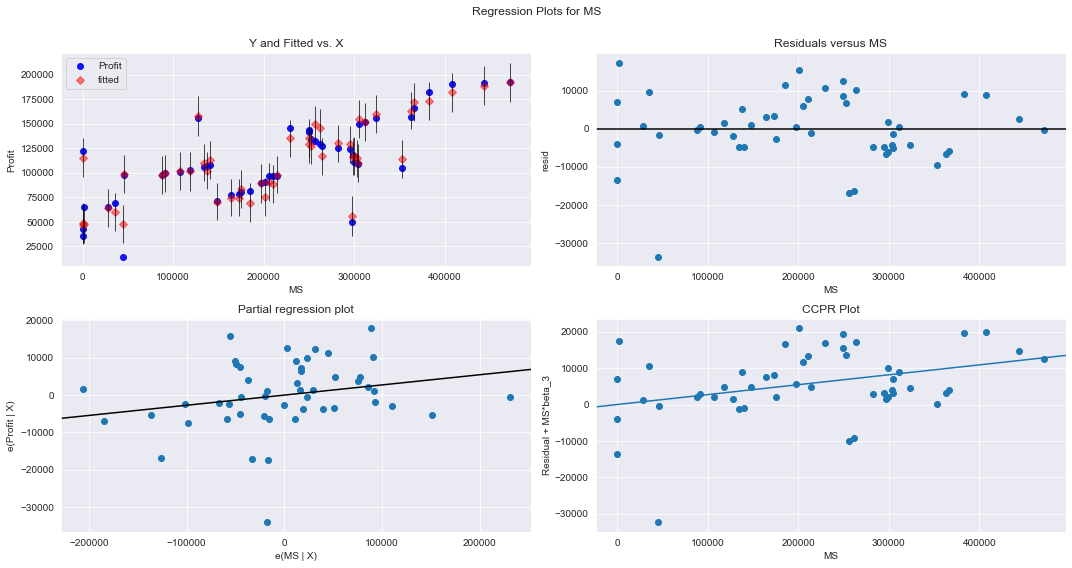

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()

Model Deletion Diagnostics

Detecting Influencers/Outliers

1)Cook's Distance 2) Leverage value 

In [45]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

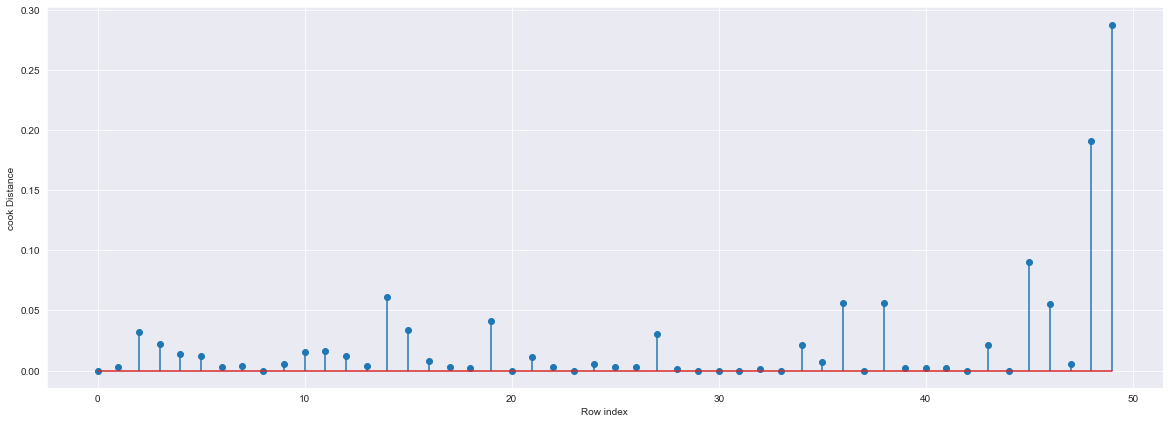

In [43]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cook Distance')
plt.show()

In [44]:
np.argmax(c),np.max(c)

(49, 0.2880822927543267)

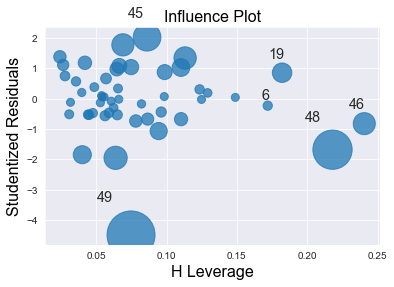

In [47]:
influence_plot(model)
plt.show()

In [48]:
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.36

In [50]:
startup[startup.index.isin([49])]

,spend,Administration,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model 

In [52]:
startup2=startup.drop(startup.index[[49]],axis=0).reset_index(drop=True)
startup2

,spend,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Ddeletion Diagnostics and Final Model 

In [53]:
while np.max(c)>0.5:
    model=smf.ols("Profit~spend+Administration+MS",data=startup2).fit()
    (c,_)=model=get_influence().cooks_distancce
    c
    np.argmax(c),np.maxx(c)
    startup2=startup2.drop(startup2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~spend+Administration+MS",data=startup2).fit()
    final_model.rsquared,final_model.aic
    print("thus model accuracy is improved to",final_model.rsquared)

thus model accuracy is improved to 0.9613162435129847


In [54]:
final_model.rsquared

0.9613162435129847

In [55]:
startup2

,spend,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model prediction

In [56]:
data=pd.DataFrame({'spend':70000,'Administration':90000,'MS':140000},index=[0])
data

,spend,Administration,MS
0,70000,90000,140000


In [57]:
final_model.predict(data)

0    108727.154753
dtype: float64

In [59]:
pred_y=final_model.predict(startup2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

Table containing R^2 value for each preapred model

In [61]:
d2={'Prep_model':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_model,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
